In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import numpy as np

In [167]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1)

In [2]:
dataset = pd.read_pickle('../../geodata/results/01_master_building_dataset.pkl')


In [164]:
rename_col = {
       'Dac1' :'Roof', 
       'Fas2' :'Fassade',  
       'Geb12':'Building',  
       'Kue8' :'Artificial Grass',  
       'Nat3' :'Nature',  
       'Veg3' :'Roof', 
       'Ver6' :'Road Traffic', 
       'sky'  :'Sky', 
       'Abb7' :'Industrial', 
       'Abw14':'Waste Waster', 
       'Flu18':'Airfield',
       'Ueb5' :'Other', 
       'Gew1' :'WaterBody',  
       'Hel19':'Heliport', 
       'Keh15':'Waste Inceneration',  
       'Lan10':'Agriculture', 
       'Lan17':'Airport', 
       'Sak13':'Sacral',  
       'Sie9' :'Settlement', 
       'Ver11':'High-Performing Traffic',  
       'Was16':'Water Basin',  
}

In [174]:
plt.rcParams['svg.fonttype'] = 'none'

C:\Users\swietek\AppData\Local\Temp\ipykernel_15008\980635792.py:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(plt.cm.ScalarMappable(cmap="RdBu", norm=norm),
C:\Users\swietek\AppData\Local\Temp\ipykernel_15008\980635792.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ordr_lst, ha = 'left')


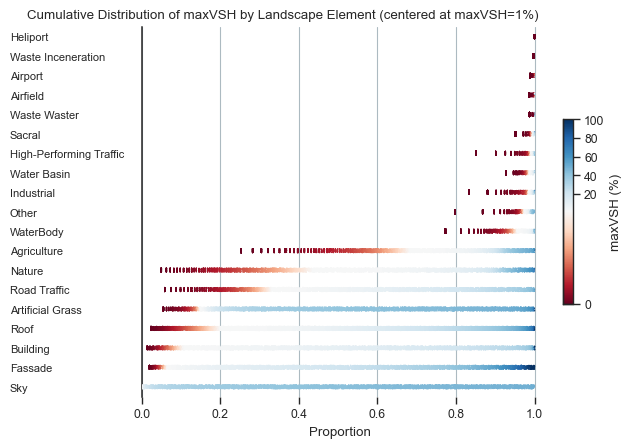

In [281]:
dat = dataset[maxvsh_cols.drop('maxvsh_Sie9')].sample(100000)
dat.columns = dat.columns.str.replace('maxvsh_', '')
dat = dat.rename(columns = rename_col)
dat = dat.melt()
dat['pct'] = dat.groupby('variable').transform(lambda x: x.rank(pct = True, method = 'max'))
ordr_lst = dat.groupby('variable')['value'].apply(lambda x: stats.percentileofscore(x,.5)).sort_values(ascending = False).index.tolist()
norm = mpl.colors.TwoSlopeNorm(vmin=0, vmax=100, vcenter=1)

ax = sns.stripplot(data = dat.sample(100000), 
              y = 'variable', hue = 'value', x = 'pct', palette = 'RdBu', 
              size = 1, order = ordr_lst, hue_norm=norm)

ax.get_legend().remove()
ax.figure.colorbar(plt.cm.ScalarMappable(cmap="RdBu", norm=norm), 
                   orientation='vertical', label = 'maxVSH (%)', shrink = 0.5)

sns.despine()
ax.set_xlabel('Proportion')
ax.set_ylabel('')
ax.set_yticklabels(ordr_lst, ha = 'left')
ax.yaxis.set_tick_params(pad=90,            # Pad tick labels so they don't go over y-axis
                         labelsize=8,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left

ax.set_title('Cumulative Distribution of maxVSH by Landscape Element (centered at maxVSH=1%)',loc = 'right', wrap = True)#,fontweight = 'bold', pad = 0)
ax.spines[['top','right','bottom']].set_visible(False)
ax.spines['left'].set_linewidth(1.1)
# We do want ticks on the bottom x-axis only
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(0, 1.01)
# Reformat x-axis tick labels
ax.grid(which="major", axis='x', color='#758D99', alpha=0.6, zorder=1)
# plt.savefig('../../vc_plots/fig1_ch_maxvsh_coloredecdf.svg')

C:\Users\swietek\AppData\Local\Temp\ipykernel_15008\1019434519.py:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(plt.cm.ScalarMappable(cmap="RdBu", norm=norm),
C:\Users\swietek\AppData\Local\Temp\ipykernel_15008\1019434519.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ordr_lst, ha = 'left')


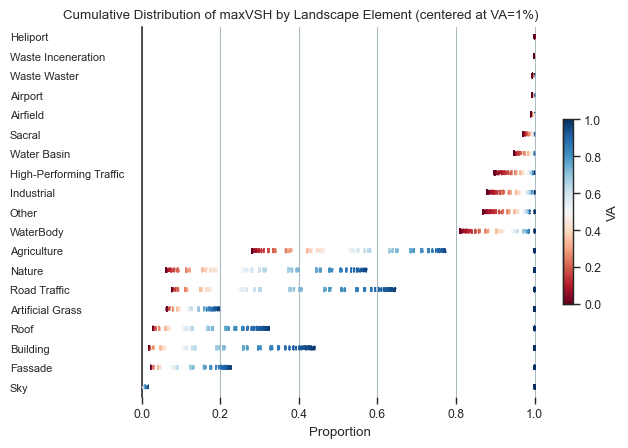

In [279]:
vaccess_cols = dataset.columns[dataset.columns.str.contains('vwa')]
dat = dataset[vaccess_cols.drop('vwa_Sie9')].sample(100000)
dat.columns = dat.columns.str.replace('vwa_', '')
dat = dat.rename(columns = rename_col)
dat = dat.melt()
dat['pct'] = dat.groupby('variable').transform(lambda x: x.rank(pct = True, method = 'max'))
ordr_lst = dat.groupby('variable')['value'].apply(lambda x: stats.percentileofscore(x,.5)).sort_values(ascending = False).index.tolist()
norm = mpl.colors.TwoSlopeNorm(vmin=0, vmax=1, vcenter=.5)

ax = sns.stripplot(data = dat.sample(100000), 
              y = 'variable', hue = 'value', x = 'pct', palette = 'RdBu', 
              size = 1, order = ordr_lst, hue_norm=norm)
ax.get_legend().remove()
ax.figure.colorbar(plt.cm.ScalarMappable(cmap="RdBu", norm=norm), 
                   orientation='vertical', label = 'VA', shrink = 0.5)

sns.despine()
ax.set_xlabel('Proportion')
ax.set_ylabel('')
ax.set_yticklabels(ordr_lst, ha = 'left')
ax.yaxis.set_tick_params(pad=90,            # Pad tick labels so they don't go over y-axis
                         labelsize=8,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left

ax.set_title('Cumulative Distribution of maxVSH by Landscape Element (centered at VA=1%)',loc = 'right', wrap = True)# fontweight = 'bold')
ax.spines[['top','right','bottom']].set_visible(False)
ax.spines['left'].set_linewidth(1.1)
# We do want ticks on the bottom x-axis only
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(0, 1.01)
# Reformat x-axis tick labels
ax.grid(which="major", axis='x', color='#758D99', alpha=0.6, zorder=1)

In [178]:
maxvsh_cols    = dataset.columns[dataset.columns.str.contains('maxvsh')].tolist()
vaccess_cols   = dataset.columns[dataset.columns.str.contains('vwa')].tolist()
# mean_cols      = dataset.columns[dataset.columns.str.contains('mn')].tolist()
dist_cols      = dataset.columns[dataset.columns.str.contains('sum_')].tolist()
vconfig_cols   = np.setdiff1d(dataset.columns[np.where(dataset.columns == 'snt_0')[0][0]:np.where(dataset.columns == 'cmpx_gini')[0][0]+1].tolist(),dist_cols).tolist()
id_cols        = ['ID_Geb','Stockwerk','FassPktX','FassPktY','FassPktZ']

dataset['unit_pano'] = dataset['unit_pano'].fillna(0)

import joblib
xgb_model   = joblib.load("../../geodata/results/t10agglo_t5urban_models/All_XGB.joblib")
model_feats    = maxvsh_cols+vaccess_cols+vconfig_cols+dist_cols

import joblib
scaler_4model   = joblib.load("../../geodata/results/scaler_for_model.joblib")

X = dataset.copy()
X[model_feats] = scaler_4model.transform(dataset[model_feats])

X['XGB'] = xgb_model.predict(X[xgb_model.feature_names_in_])


In [211]:
sel_10agglo_lst = dataset.groupby(['Agglo_Name','Rich_Nabr'])['GMDNR'].size().unstack().sort_values(by = 'R', ascending = False).head(10).index.tolist()
dat = X.query("Agglo_Name in @sel_10agglo_lst")
dat['income_rank'] = dat.groupby("Agglo_Name")['net_income_ptp'].transform(lambda x: x.rank(pct = True))
dat['VC_rank'] = dat.groupby("Agglo_Name")['XGB'].transform(lambda x: x.rank(pct = True))

c:\Users\swietek\Miniconda3\envs\env_intel_sdb\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\swietek\Miniconda3\envs\env_intel_sdb\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


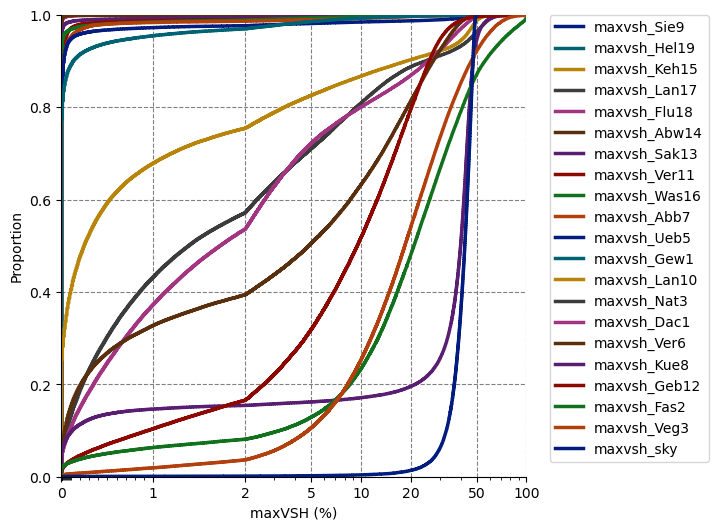

In [147]:
dat = dataset[maxvsh_cols].sample(100000).melt()

plt.figure(figsize = (6,6))
ordr_lst = dat.groupby('variable')['value'].apply(lambda x: stats.percentileofscore(x,1)).sort_values(ascending = True).index.tolist()
ax = sns.ecdfplot(data = dat, x = 'value', hue = 'variable', hue_order = ordr_lst, palette = 'dark', legend = True, linewidth=2.5)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels = ordr_lst[::-1])
plt.xlim((0,100))
plt.xlabel('maxVSH (%)')
plt.xscale('symlog')
ax.set_xticks([0,1,2,5,10,20,50,100])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax.xaxis.set_minor_locator(y_minor)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

sns.despine()

# plt.savefig('../../vc_plots/fig1_ch_maxvsh_ecdf.svg')